# Clustering - KMeans
### Overview 
Interacting with friends on a social networking service (SNS) has become a rite of passage for teenagers around the world. The many millions of teenage consumers using such sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. For instance, sporting apparel is likely to be a difficult sell to teens with no interest in sports.


In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### Read the data 

In [3]:
# read the data
data = pd.read_csv(r"D:\new Data science class\project\Kmeans\teenagemkt.csv")
data.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,18.982,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.801,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,18.335,69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.995,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Dataset information :
* The dataset contatins 38 variables like: age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. 
* The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile

### EDA

#### Null check 

In [4]:
# check for nulls
data.isnull().sum()

age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

* There are nulls in age column. We will impute these nulls 

#### Imputing nulls in age 

In [5]:
# Count the nulls in age 
cntr = len(data.age[data.age.isnull()])

# Create random age between 13-19 for imputation 
teen_ages = np.round(np.random.uniform(13,19,cntr),3)
teen_ages

# impute nulls in age with teen_ages 
data.age[data.age.isnull()]= teen_ages

# Final check wheter the imputaion is done properly 
len(data.age[data.age.isnull()])

C:\Users\nikaj\AppData\Local\Temp/ipykernel_5444/2641925111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age.isnull()]= teen_ages


0

#### Check the description of age column 

In [6]:
# Check description of age column 
data.age.describe()

count    30000.000000
mean        17.657928
std          7.234565
min          3.086000
25%         16.101000
50%         17.147000
75%         18.177000
max        106.927000
Name: age, dtype: float64

* Above given dataset is for teenage but it can be seen from description that the age range is from 3 to 106 years. 
* Hence we will use only those records that have age between 13-20

In [7]:
# subset the data to include only teenage customers 
teendata = data[(data.age>13) & (data.age<20)]

In [8]:
# Check the no of records after cleaning 
len(teendata)

29563

In [9]:
# Primary data analysis 
teendata.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,18.982,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.801,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,18.335,69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.995,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Scaling of data 

In [10]:
# standardize the data 
teendata_std = teendata.copy()

In [11]:
ss = StandardScaler()
teendata_std.iloc[:,:]= ss.fit_transform(teendata_std.iloc[:,:])

In [12]:
teendata.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,18.982,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.801,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,18.335,69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18.875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.995,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [13]:
teendata_std.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,1.431803,-0.635634,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
1,1.298423,-0.826912,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.050725,1.062104,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
2,0.955024,1.058540,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,2.020056,-0.220493,-0.175322
3,1.352954,-0.826912,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
4,1.441383,-0.553658,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.050725,-0.370724,2.262820,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,2.281789,2.733228


### Creating clusters for KMeans 

In [14]:
# create clusters 
def createClusters(data):
    wcss = []
    silhscores = []
    
    # range of clusters
    k_list = range(2,10)
    
    # build model for each k and calculatr wcss and silhscore 
    for k in k_list:
        # build the model 
        model = KMeans(n_clusters= k).fit(data)
        
        # wcss
        wcss.append(model.inertia_)
        
        # silhoutte scores 
        clusters = model.fit_predict(data)
        silhscores.append(silhouette_score(data,clusters))
        
    return (k_list,wcss,silhscores)

In [15]:
# run the function 
lst_clusters, lst_wcss,lst_silhscores = createClusters(teendata_std)

In [16]:
len(lst_clusters)

8

In [17]:
lst_wcss

[1067665.0775670835,
 1037967.1247008533,
 1009282.3229777304,
 983322.4721065237,
 961978.3727346258,
 937669.6447627143,
 923891.5008792442,
 909962.9972234819]

In [18]:
lst_silhscores

[0.40280109131475555,
 0.2921523182796996,
 0.2860965470369013,
 0.28622334873011324,
 0.27677663484463516,
 0.22208224423370604,
 0.22247784610672763,
 0.23747390954529657]

### Plot the wcss against no of clusters to find best k 

Text(0.5, 1.0, 'Plot of noof cluster vs wcss')

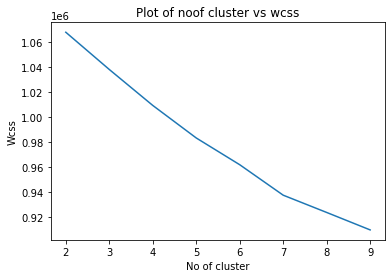

In [20]:
# plot wcss
plt.plot(lst_clusters, lst_wcss)
plt.xlabel("No of cluster")
plt.ylabel("Wcss")
plt.title("Plot of noof cluster vs wcss")

* This plot does not gives any information regarding best k 
* Hence we will plot No of cluster vs Silhscores

### Plotting no of clusters vs silhoutte score

Text(0.5, 1.0, 'Plot of no of cluster vs Silhoutte score')

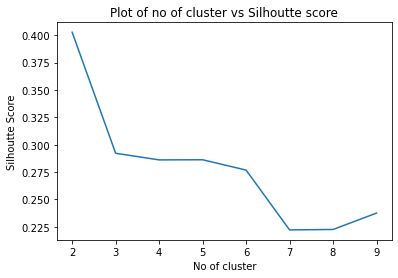

In [21]:
# plot silhouette scores 
plt.plot(lst_clusters, lst_silhscores)
plt.xlabel("No of cluster")
plt.ylabel("Silhoutte Score")
plt.title("Plot of no of cluster vs Silhoutte score")

In [22]:
# based on chart the best k = 2
bestK= 2 
model = KMeans(n_clusters=bestK).fit(teendata_std)

In [24]:
clusters = model.labels_
clusters

array([0, 1, 0, ..., 0, 0, 0])

In [25]:
# add clusters to dataset 
teendata_std["cluster"]= clusters

In [26]:
teendata_std

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,1.431803,-0.635634,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
1,1.298423,-0.826912,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,1.062104,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,1
2,0.955024,1.058540,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,2.020056,-0.220493,-0.175322,0
3,1.352954,-0.826912,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
4,1.441383,-0.553658,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,2.262820,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,2.281789,2.733228,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.680911,-0.826912,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
29996,-0.918932,-0.799587,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
29997,-0.924827,-0.826912,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,1.704464,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
29998,-0.487104,-0.826912,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0


In [27]:
# get the centroids 
model.cluster_centers_

array([[ 0.01952393, -0.04269654, -0.08140053, -0.07393003, -0.03664263,
        -0.04297051, -0.04997058, -0.05232445, -0.06091918, -0.04299968,
        -0.02341675, -0.07607599, -0.12307179, -0.09943476, -0.0669128 ,
        -0.08115847, -0.1382556 , -0.0938204 , -0.05363469, -0.01801522,
        -0.10621464, -0.10257899, -0.06755837, -0.07725235, -0.04071282,
        -0.0363037 , -0.19036143, -0.09320398, -0.02579872, -0.12828829,
        -0.1249199 , -0.1554631 , -0.11572629, -0.11940133, -0.09708497,
        -0.07545855, -0.09388014, -0.11693361],
       [-0.12097899,  0.26456682,  0.50439399,  0.45810343,  0.22705411,
         0.26626446,  0.30963998,  0.3242256 ,  0.37748241,  0.26644517,
         0.14510064,  0.47140078,  0.7626077 ,  0.61614209,  0.41462156,
         0.50289408,  0.85669334,  0.58135305,  0.33234446,  0.11163033,
         0.65815329,  0.63562516,  0.41862181,  0.47869   ,  0.2522748 ,
         0.22495388,  1.17956429,  0.57753343,  0.1598604 ,  0.79493148,
   

In [28]:
# create a datframe to store the cluster centers and features for each cluster
centers = pd.DataFrame(model.cluster_centers_,columns= teendata_std.columns[:-1])

In [29]:
centers

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.019524,-0.042697,-0.081401,-0.073930,-0.036643,-0.042971,-0.049971,-0.052324,-0.060919,-0.043000,...,-0.025799,-0.128288,-0.124920,-0.155463,-0.115726,-0.119401,-0.097085,-0.075459,-0.093880,-0.116934
1,-0.120979,0.264567,0.504394,0.458103,0.227054,0.266264,0.309640,0.324226,0.377482,0.266445,...,0.159860,0.794931,0.774059,0.963319,0.717092,0.739864,0.601582,0.467575,0.581723,0.724573


In [30]:
cluster_data = pd.DataFrame(columns = ['cluster', 'center','feature'])
print(cluster_data)

Empty DataFrame
Columns: [cluster, center, feature]
Index: []


In [31]:
for i in range(len(np.unique(clusters))):
    cluster_data = cluster_data.append(
        pd.DataFrame(zip(np.repeat(centers.index[i],len(centers.columns)),
                         centers.iloc[i,], centers.columns), 
                     columns=['cluster', 'center','feature']))

In [32]:
cluster_data

,cluster,center,feature
0,0,0.019524,age
1,0,-0.042697,friends
2,0,-0.081401,basketball
3,0,-0.073930,football
4,0,-0.036643,soccer
...,...,...,...
33,1,0.739864,abercrombie
34,1,0.601582,die
35,1,0.467575,death
36,1,0.581723,drunk


### Interpreting the clusters 

In [35]:
# interpret the cluster 
def plotData(cluster, top= 10):
    
    df = cluster_data [cluster_data.cluster==cluster].sort_values('center', ascending= False).head(top)
    df = df.set_index('cluster')
    
    # plot the bar chart
    sns.barplot(x= df.feature, y = list(range(top,0,-1)), color = 'green')
    plt.xticks(rotation=90)
    plt.title('top {} trending features in cluster{}'.format(top,cluster+1))

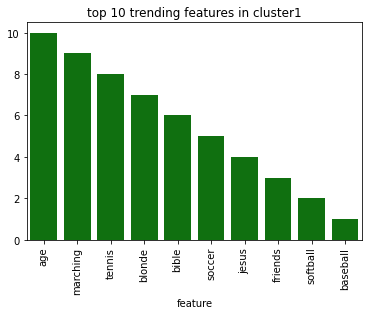

In [36]:
# find the top features in each cluster 
plotData(0,10)

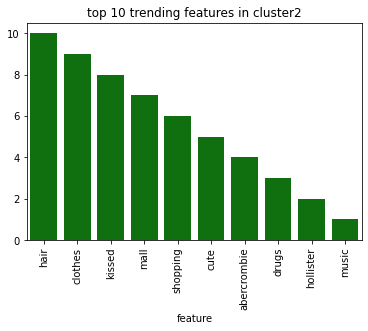

In [37]:
plotData(1,10)